In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_t = pd.read_csv('transcript_all.csv')
df_p = pd.read_csv('product_all.csv')

# times of query for each city
cities = 'New York, Las Vegas, Rome, Paris, London, Dubai, Barcelona, Madrid, Singapore, Venice, Milan, Naples, Budapest, Edinburgh, Florence'
cities0 = cities.lower().split(', ')

c = []
for s in cities0:
    c.append(s.replace(' ','-'))

d = []
for city in c:
    d.append(df_t.chat_start_url.apply(lambda s: city in str(s)).sum())
    
city_q = pd.DataFrame({'city':cities.split(', '), 'q':d}).sort_values('q', ascending=False).set_index('city')
s = city_q.q.sum()
city_q['percentage'] = city_q.q.apply(lambda x: x/s)
city_q.drop(['q'],axis=1, inplace=True)

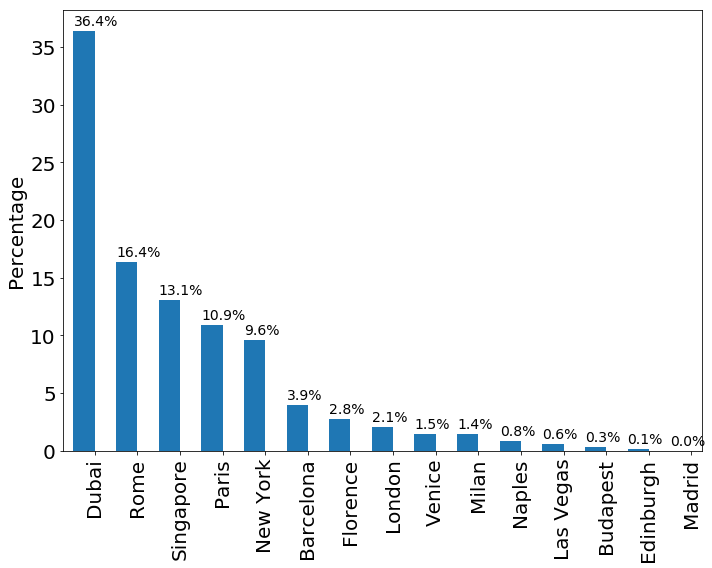

In [17]:
ax1 = (city_q*100).plot(kind='bar',figsize=(10,8),width=.5,position=1,fontsize=20)
for i,p in enumerate(ax1.patches):
    ax1.annotate(str(round(city_q.percentage[i]*100,1))+'%',(p.get_x(), p.get_height()+0.5), color='k',fontsize=14)
ax1.legend_.remove()
plt.ylabel('Percentage',fontsize=20)
plt.xlabel('')
plt.tight_layout()
plt.savefig('city_rank.png')
plt.show()

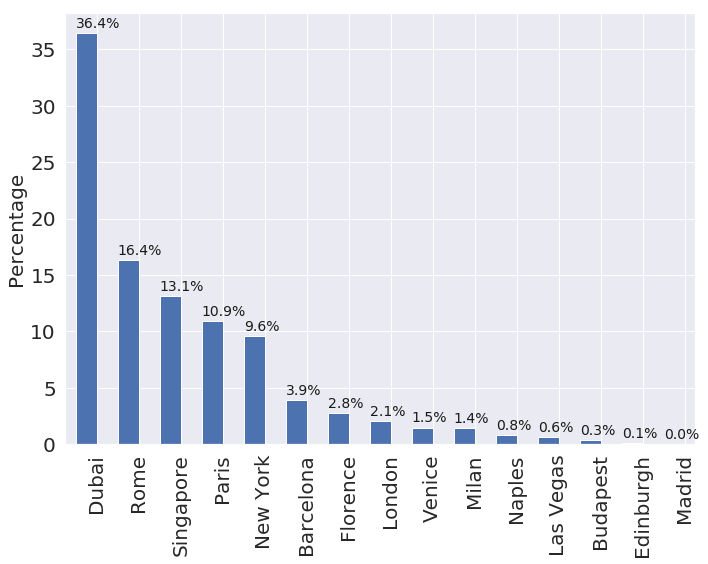

In [18]:
import seaborn as sns
sns.set()
ax1 = (city_q*100).plot(kind='bar',figsize=(10,8),width=.5,position=1,fontsize=20)
for i,p in enumerate(ax1.patches):
    ax1.annotate(str(round(city_q.percentage[i]*100,1))+'%',(p.get_x(), p.get_height()+0.5), color='k',fontsize=14)
ax1.legend_.remove()
plt.ylabel('Percentage',fontsize=20)
plt.xlabel('')
plt.tight_layout()
plt.savefig('city_rank.png')
plt.show()